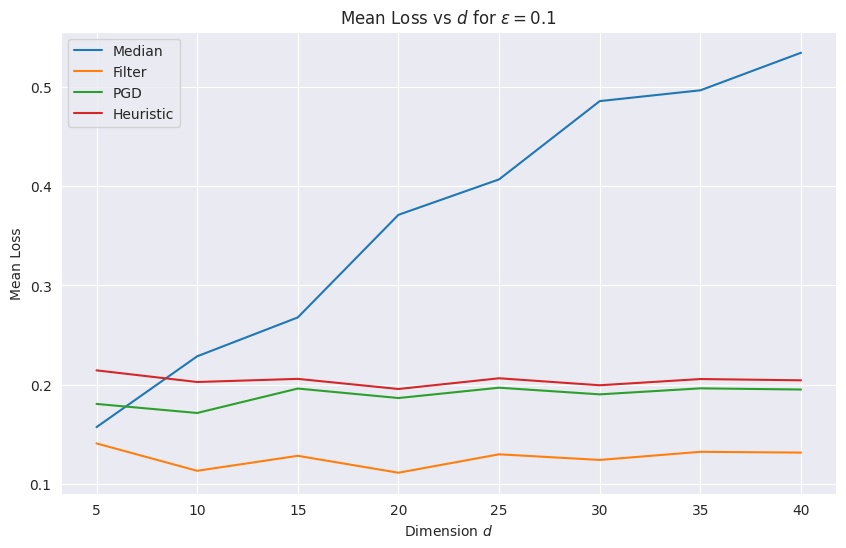

In [7]:
# Parse results.csv into a dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read in results.csv
df = pd.read_csv('results.csv')

# For epsilon = 0.1, plot the mean loss over d for each esitmator as a line plot
df_01 = df[df['epsilon'] == 0.1]
median_estimator = df_01[df_01['estimator'] == 'Median']
filter_estimator = df_01[df_01['estimator'] == 'Filter2018Python']
pgd_estimator = df_01[df_01['estimator'] == 'CDGS20_PGD']
heuristic_estimator = df_01[df_01['estimator'] == 'HeuristicRust']

# Plot all of the above estimators on a line graph with seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(median_estimator['d'], median_estimator['loss'], label='Median')
plt.plot(filter_estimator['d'], filter_estimator['loss'], label='Filter')
plt.plot(pgd_estimator['d'], pgd_estimator['loss'], label='PGD')
plt.plot(heuristic_estimator['d'], heuristic_estimator['loss'], label='Heuristic')
plt.legend()
plt.xlabel('Dimension $d$')
plt.ylabel('Mean Loss')
plt.title('Mean Loss vs $d$ for $\epsilon = 0.1$')
plt.savefig('mean_loss_vs_d_for_epsilon_01.png')
plt.show()


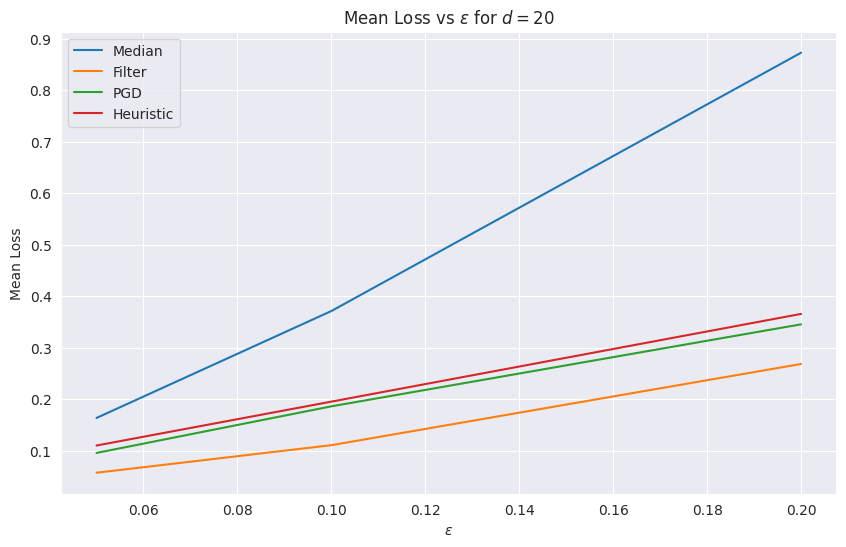

In [9]:
# Make another plot for d = 20, and plot the mean loss over epsilon for each estimator as a line plot
df_d20 = df[df['d'] == 20]
median_estimator = df_d20[df_d20['estimator'] == 'Median']
filter_estimator = df_d20[df_d20['estimator'] == 'Filter2018Python']
pgd_estimator = df_d20[df_d20['estimator'] == 'CDGS20_PGD']
heuristic_estimator = df_d20[df_d20['estimator'] == 'HeuristicRust']

# Plot all of the above estimators on a line graph with seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(median_estimator['epsilon'], median_estimator['loss'], label='Median')
plt.plot(filter_estimator['epsilon'], filter_estimator['loss'], label='Filter')
plt.plot(pgd_estimator['epsilon'], pgd_estimator['loss'], label='PGD')
plt.plot(heuristic_estimator['epsilon'], heuristic_estimator['loss'], label='Heuristic')
plt.legend()
plt.xlabel('$\epsilon$')
plt.ylabel('Mean Loss')
plt.title('Mean Loss vs $\epsilon$ for $d = 20$')
plt.savefig('mean_loss_vs_epsilon_for_d20.png')
plt.show()

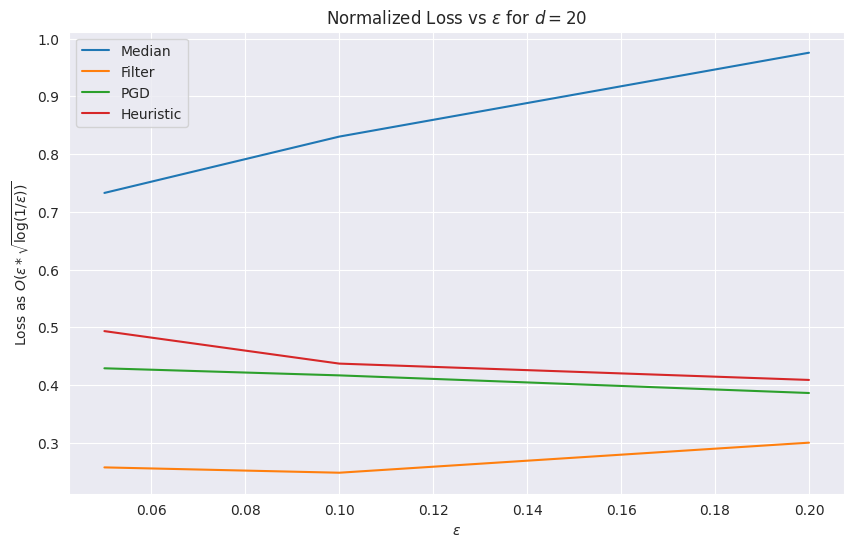

In [10]:
# Make another graph that plots the normalized loss (reg1) for each estimator for d = 20

# Plot all of the above estimators on a line graph with seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(median_estimator['epsilon'], median_estimator['loss_reg1'], label='Median')
plt.plot(filter_estimator['epsilon'], filter_estimator['loss_reg1'], label='Filter')
plt.plot(pgd_estimator['epsilon'], pgd_estimator['loss_reg1'], label='PGD')
plt.plot(heuristic_estimator['epsilon'], heuristic_estimator['loss_reg1'], label='Heuristic')
plt.legend()
plt.xlabel('$\epsilon$')
plt.ylabel('Loss as $O(\epsilon * \sqrt{\log(1/\epsilon))}$')
plt.title('Normalized Loss vs $\epsilon$ for $d = 20$')
plt.savefig('normalized_loss_vs_epsilon_for_d20.png')
plt.show()



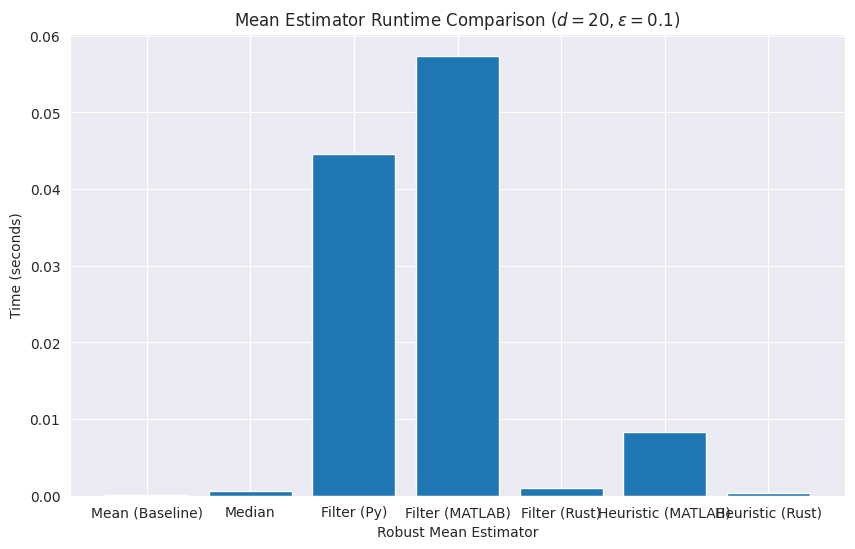

In [21]:
# load bench_filter_comparison and plot the data

# Read in results.csv
df = pd.read_csv('bench_filter_comparison.csv')

# Make a bar plot with the data with seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Mean'])
plt.xlabel('Robust Mean Estimator')
plt.ylabel('Time (seconds)')
plt.title('Mean Estimator Runtime Comparison ($d = 20, \epsilon = 0.1$)')
plt.savefig('filter_comparison.png')
plt.show()

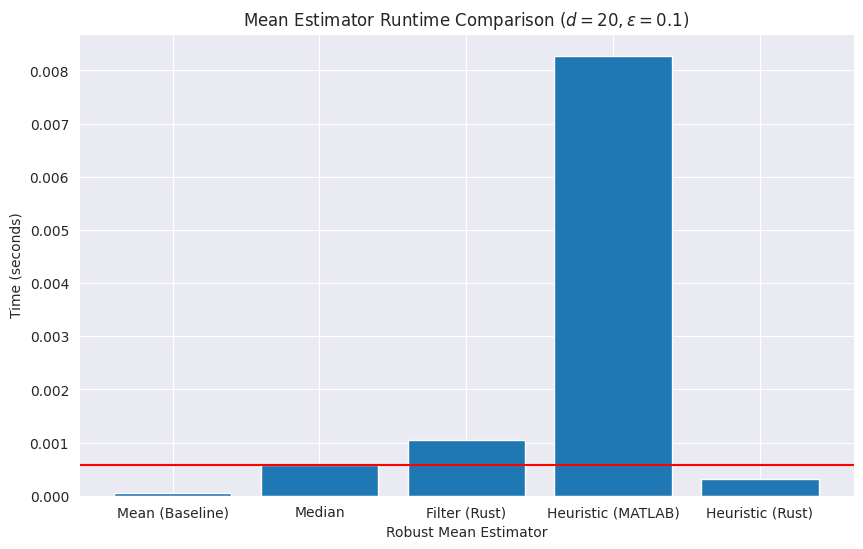

In [20]:
# MAke the same graph as above but ignoring the filter (py) and filter (MATLAB) estimators
df = df[df['Name'] != 'Filter (Py)']
df = df[df['Name'] != 'Filter (MATLAB)']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Mean'])

# Draw a horizontal line over the 'Median' data point
plt.axhline(y=0.0005698204040527344, color='r', linestyle='-')

plt.xlabel('Robust Mean Estimator')
plt.ylabel('Time (seconds)')
plt.title('Mean Estimator Runtime Comparison ($d = 20, \epsilon = 0.1$)')
plt.savefig('filter_comparison_2.png')
plt.show()